In [6]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
plt.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

df = pd.read_csv('/Users/isaacsoong/Desktop/Projects/PortfolioProject/dataset/movies.csv')


In [7]:
df.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0
5,Friday the 13th,R,Horror,1980,"May 9, 1980 (United States)",6.4,123000.0,Sean S. Cunningham,Victor Miller,Betsy Palmer,United States,550000.0,39754601.0,Paramount Pictures,95.0
6,The Blues Brothers,R,Action,1980,"June 20, 1980 (United States)",7.9,188000.0,John Landis,Dan Aykroyd,John Belushi,United States,27000000.0,115229890.0,Universal Pictures,133.0
7,Raging Bull,R,Biography,1980,"December 19, 1980 (United States)",8.2,330000.0,Martin Scorsese,Jake LaMotta,Robert De Niro,United States,18000000.0,23402427.0,Chartoff-Winkler Productions,129.0
8,Superman II,PG,Action,1980,"June 19, 1981 (United States)",6.8,101000.0,Richard Lester,Jerry Siegel,Gene Hackman,United States,54000000.0,108185706.0,Dovemead Films,127.0
9,The Long Riders,R,Biography,1980,"May 16, 1980 (United States)",7.0,10000.0,Walter Hill,Bill Bryden,David Carradine,United States,10000000.0,15795189.0,United Artists,100.0


In [8]:
# Looking for missing data
for col in df.columns:
  pct_missing = np.mean(df[col].isnull())
  print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [9]:
# Dropping rows with missing values
df = df.dropna()



In [10]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [11]:
# Change data types of columns
df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')

In [15]:
# Some of the years in the 'year' column and 'released' column does not match
# Extracts the year from the 'released' column and creates a new column 'yearcorrect' (regex)
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [16]:
df = df.sort_values(by=['gross'], inplace=False, ascending=False)


In [17]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


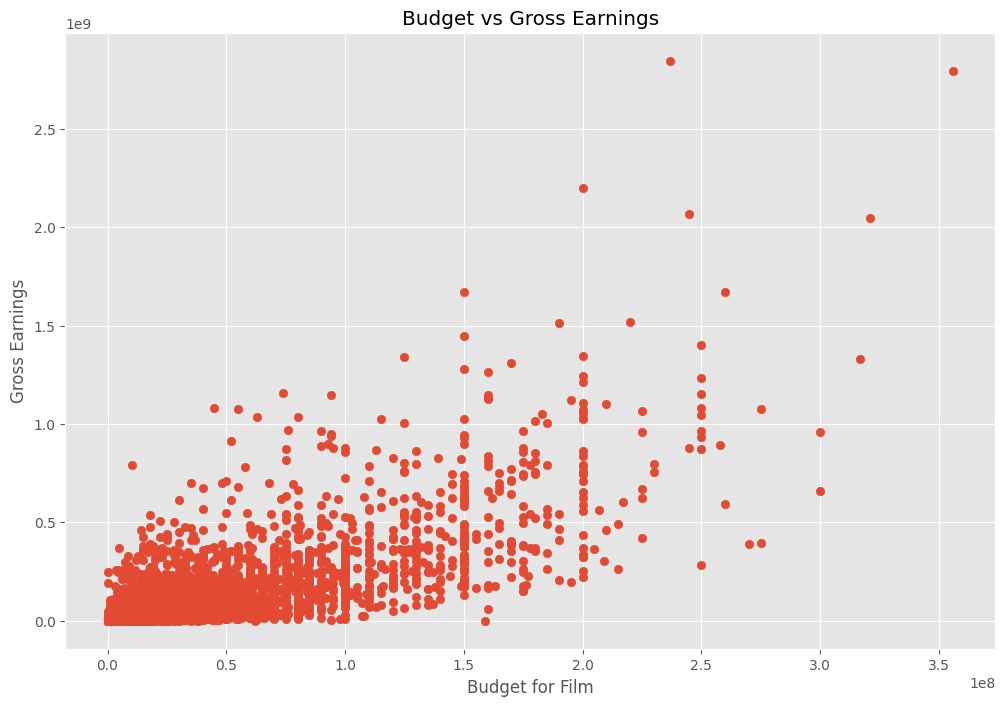

In [ ]:
# Scatter plot with budget vs gross
plt.figure(figsize=(12,8))
plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earnings')
plt.show()

<Axes: xlabel='budget', ylabel='gross'>

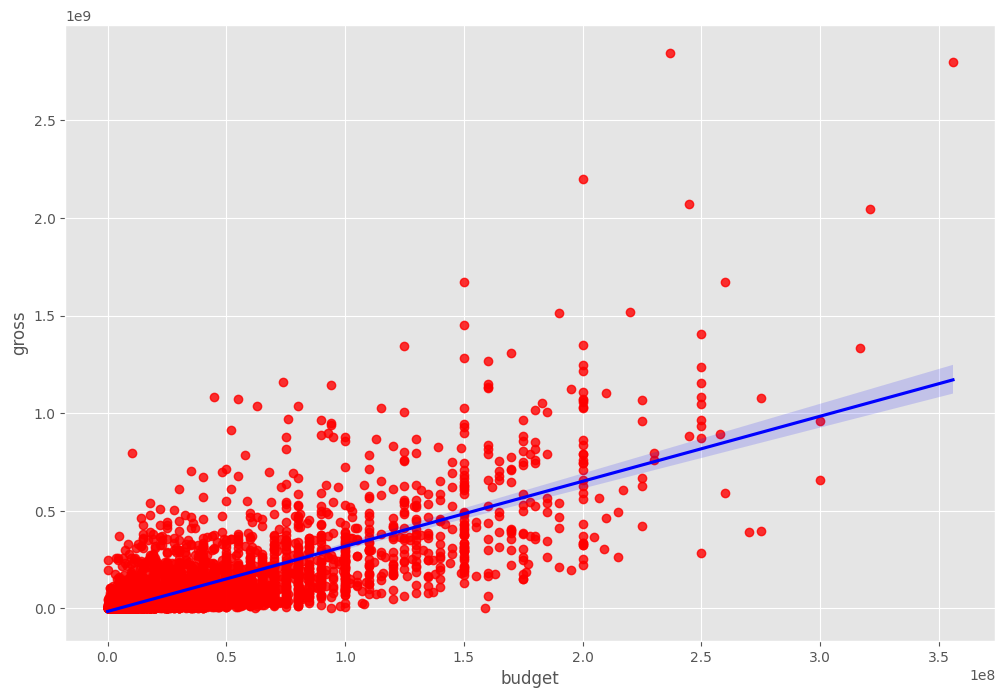

In [ ]:
# Plot budget vs gross using seaborn

sns.regplot(x = df['budget'], y = df['gross'], data = df, scatter_kws={'color':'red'}, line_kws={'color':'blue'})

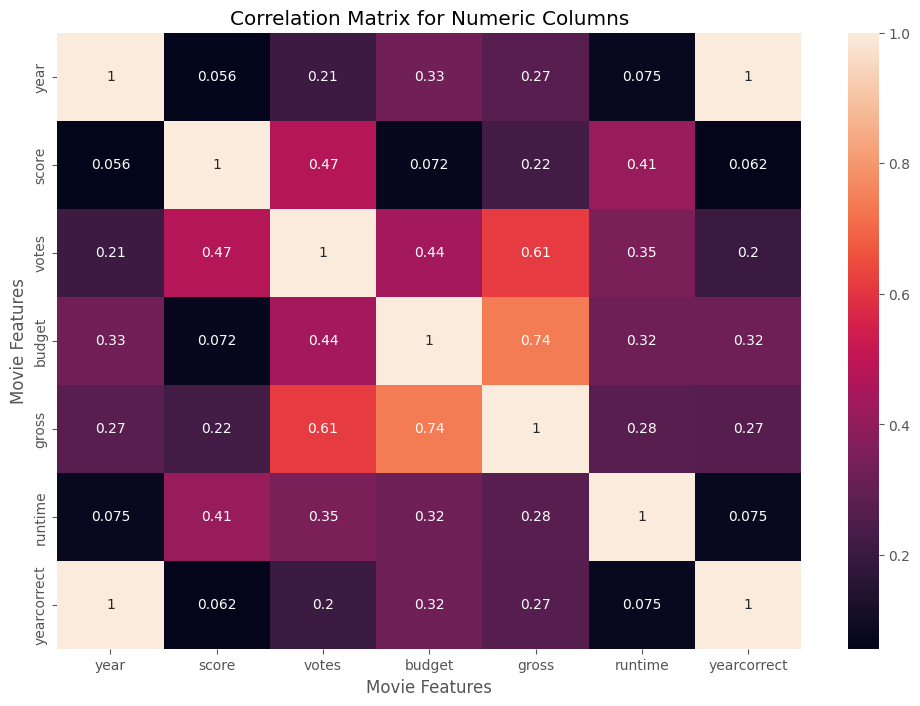

In [ ]:
correlation_matrix = df.corr(numeric_only = True)
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# High correlation between budget and gross



In [ ]:
# To make columns with non-numerical dtypes categorical
df_numerized = df

for col_name in df_numerized.columns:
  if(df_numerized[col_name].dtype == 'object'):
    df_numerized[col_name] = df_numerized[col_name].astype('category')
    df_numerized[col_name] = df_numerized[col_name].cat.codes # cat.codes gives the actual number assignments

df_numerized.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
5445,386,5,0,2009,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,2019,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,1997,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,2015,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,2018,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018


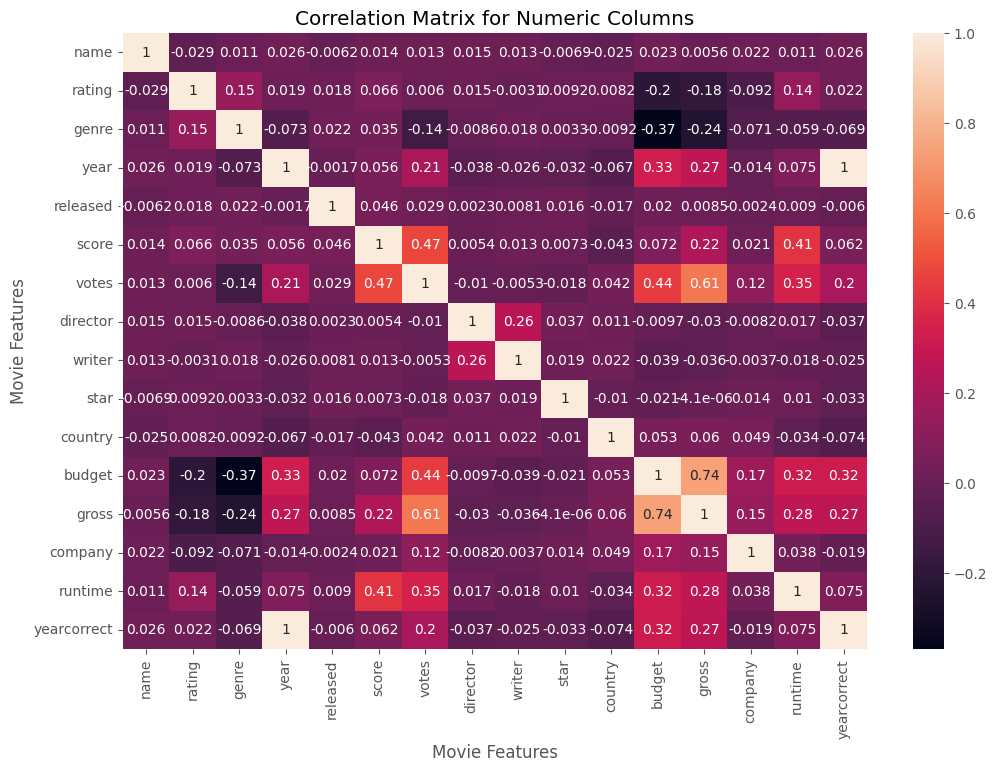

In [ ]:
correlation_matrix = df_numerized.corr()
sns.heatmap(correlation_matrix, annot = True)
plt.title('Correlation Matrix for Numeric Columns')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

# High correlation between budget and gross



In [ ]:
# A cleaner view to see the correlation matrix
correlation_mat = df_numerized.corr()
corr_pairs = correlation_mat.unstack()
corr_pairs

name         name           1.000000
             rating        -0.029234
             genre          0.010996
             year           0.025542
             released      -0.006152
             score          0.014450
             votes          0.012615
             director       0.015246
             writer         0.012880
             star          -0.006882
             country       -0.025490
             budget         0.023392
             gross          0.005639
             company        0.021697
             runtime        0.010850
             yearcorrect    0.025542
rating       name          -0.029234
             rating         1.000000
             genre          0.147796
             year           0.019499
             released       0.018083
             score          0.065983
             votes          0.006031
             director       0.014656
             writer        -0.003149
             star           0.009196
             country        0.008230
             budget        -0.203946
             gross         -0.181906
             company       -0.092357
             runtime        0.140792
             yearcorrect    0.022021
genre        name           0.010996
             rating         0.147796
             genre          1.000000
             year          -0.073167
             released       0.022142
             score          0.035106
             votes         -0.135990
             director      -0.008553
             writer         0.017578
             star           0.003341
             country       -0.009164
             budget        -0.368523
             gross         -0.244101
             company       -0.071334
             runtime       -0.059237
             yearcorrect   -0.069147
year         name           0.025542
             rating         0.019499
             genre         -0.073167
             year           1.000000
             released      -0.001740
             score          0.056386
             votes          0.206021
             director      -0.038354
             writer        -0.025908
             star          -0.032157
             country       -0.066748
             budget         0.327722
             gross          0.274321
             company       -0.014333
             runtime        0.075077
             yearcorrect    0.998726
released     name          -0.006152
             rating         0.018083
             genre          0.022142
             year          -0.001740
             released       1.000000
             score          0.045874
             votes          0.028833
             director       0.002308
             writer         0.008072
             star           0.015706
             country       -0.017228
             budget         0.019952
             gross          0.008501
             company       -0.002407
             runtime        0.008975
             yearcorrect   -0.005989
score        name           0.014450
             rating         0.065983
             genre          0.035106
             year           0.056386
             released       0.045874
             score          1.000000
             votes          0.474256
             director       0.005413
             writer         0.012843
             star           0.007296
             country       -0.043051
             budget         0.072001
             gross          0.222556
             company        0.020656
             runtime        0.414068
             yearcorrect    0.061923
votes        name           0.012615
             rating         0.006031
             genre         -0.135990
             year           0.206021
             released       0.028833
             score          0.474256
             votes          1.000000
             director      -0.010376
             writer        -0.005316
             star          -0.017638
             country        0.041551
             budget         0.439675
    

In [ ]:
sorted_pairs = corr_pairs.sort_values()
sorted_pairs

,,0
genre,budget,-0.368523
budget,genre,-0.368523
gross,genre,-0.244101
genre,gross,-0.244101
rating,budget,-0.203946
budget,rating,-0.203946
rating,gross,-0.181906
gross,rating,-0.181906
votes,genre,-0.135990
genre,votes,-0.135990


In [ ]:
high_corr = sorted_pairs[(abs(sorted_pairs) > 0.5) & (sorted_pairs != 1)]
high_corr

,,0
gross,votes,0.614751
votes,gross,0.614751
gross,budget,0.740247
budget,gross,0.740247
year,yearcorrect,0.998726
yearcorrect,year,0.998726
